In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("cars24_data.csv")

In [3]:
df.head()

,Unnamed: 0,Car Name,Price,EMI,Features,Location,Car Brand,Model,Model Year,Gear,Driven (Kms),Ownership,Fuel,EMI (monthly)
0,0,2016 Maruti BalenoZETA 1.2 K12 Manual,"6,21,899","â‚¹13,834/month","1,03,354 km\n1st Owner\nPetrol",Hyderabad,Maruti,['BalenoZETA 1.2 K12'],2016,['Manual'],"1,03,354",1,Petrol,"13,834"
1,1,2015 Honda Jazz1.2 V AT Automatic,"5,24,199","â‚¹11,661/month","65,571 km\n2nd Owner\nPetrol",Hyderabad,Honda,['Jazz1.2 V AT'],2015,['Automatic'],"65,571",2,Petrol,"11,661"
2,2,2012 Maruti SwiftZDI Manual,"4,76,699","â‚¹10,604/month","78,819 km\n2nd Owner\nDiesel",Hyderabad,Maruti,['SwiftZDI'],2012,['Manual'],"78,819",2,Diesel,"10,604"
3,3,2016 Maruti Alto 800LXI Manual,"2,95,499","â‚¹6,573/month","20,215 km\n2nd Owner\nPetrol",Hyderabad,Maruti,['Alto 800LXI'],2016,['Manual'],"20,215",2,Petrol,"6,573"
4,4,2010 Hyundai i20SPORTZ 1.2 O Manual,"3,78,299","â‚¹8,415/month","79,222 km\n2nd Owner\nPetrol",Hyderabad,Hyundai,['i20SPORTZ 1.2 O'],2010,['Manual'],"79,222",2,Petrol,"8,415"


# Exploratory Data Analysis (EDA):

In [4]:
df.shape

(3034, 14)

In [5]:
df.columns

Index(['Unnamed: 0', 'Car Name', 'Price', 'EMI', 'Features', 'Location',
       'Car Brand', 'Model', 'Model Year', 'Gear', 'Driven (Kms)', 'Ownership',
       'Fuel', 'EMI (monthly)'],
      dtype='object')

#### Finding number of "Missing / NAN" values

In [6]:
df.isnull().sum()

Unnamed: 0       0
Car Name         0
Price            0
EMI              0
Features         0
Location         0
Car Brand        0
Model            0
Model Year       0
Gear             0
Driven (Kms)     0
Ownership        0
Fuel             0
EMI (monthly)    0
dtype: int64

###### NO NULL VALUES present in dataset

## Removing unwanted columns & rearranging wanted columns

In [7]:
cols = ['Car Name', 'Features', 'EMI','Unnamed: 0']
columns = ['Car Brand', 'Model', 'Price', 'Model Year','Location' ,'Fuel', 'Driven (Kms)', 'Gear', 'Ownership', 'EMI (monthly)']
df = df.drop(cols,axis=1)
df = df[columns]

In [8]:
df.head()

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,Maruti,['BalenoZETA 1.2 K12'],"6,21,899",2016,Hyderabad,Petrol,"1,03,354",['Manual'],1,"13,834"
1,Honda,['Jazz1.2 V AT'],"5,24,199",2015,Hyderabad,Petrol,"65,571",['Automatic'],2,"11,661"
2,Maruti,['SwiftZDI'],"4,76,699",2012,Hyderabad,Diesel,"78,819",['Manual'],2,"10,604"
3,Maruti,['Alto 800LXI'],"2,95,499",2016,Hyderabad,Petrol,"20,215",['Manual'],2,"6,573"
4,Hyundai,['i20SPORTZ 1.2 O'],"3,78,299",2010,Hyderabad,Petrol,"79,222",['Manual'],2,"8,415"


In [9]:
df.shape

(3034, 10)

In [10]:
##Cleaning the format of different columns
df['Model'] = df['Model'].apply(lambda x : ''.join(x))
df['Gear']  = df['Gear'].apply(lambda x: ''.join(x))
df['Price'] = df['Price'].apply(lambda x: x.replace(',',''))
df['EMI (monthly)'] = df['EMI (monthly)'].apply(lambda x: x.replace(',',''))
df['Driven (Kms)'] = df['Driven (Kms)'].apply(lambda x: x.replace(',',''))

In [11]:
df.head()

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,Maruti,['BalenoZETA 1.2 K12'],621899,2016,Hyderabad,Petrol,103354,['Manual'],1,13834
1,Honda,['Jazz1.2 V AT'],524199,2015,Hyderabad,Petrol,65571,['Automatic'],2,11661
2,Maruti,['SwiftZDI'],476699,2012,Hyderabad,Diesel,78819,['Manual'],2,10604
3,Maruti,['Alto 800LXI'],295499,2016,Hyderabad,Petrol,20215,['Manual'],2,6573
4,Hyundai,['i20SPORTZ 1.2 O'],378299,2010,Hyderabad,Petrol,79222,['Manual'],2,8415


In [12]:
#Removing duplicated rows
df = df.drop_duplicates(keep='first')

In [13]:
df.shape

(3034, 10)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3034 entries, 0 to 3033
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car Brand      3034 non-null   object
 1   Model          3034 non-null   object
 2   Price          3034 non-null   object
 3   Model Year     3034 non-null   int64 
 4   Location       3034 non-null   object
 5   Fuel           3034 non-null   object
 6   Driven (Kms)   3034 non-null   object
 7   Gear           3034 non-null   object
 8   Ownership      3034 non-null   int64 
 9   EMI (monthly)  3034 non-null   object
dtypes: int64(2), object(8)
memory usage: 260.7+ KB


In [15]:
df.dtypes

Car Brand        object
Model            object
Price            object
Model Year        int64
Location         object
Fuel             object
Driven (Kms)     object
Gear             object
Ownership         int64
EMI (monthly)    object
dtype: object

In [16]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3024, 3025, 3026, 3027, 3028, 3029, 3030, 3031, 3032, 3033],
           dtype='int64', length=3034)

In [17]:
#statistical summmary
df.describe(include='all')

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
count,3034,3034,3034,3034.000000,3034,3034,3034,3034,3034.000000,3034
unique,21,612,2406,NaN,5,4,2987,3,NaN,2406
top,Maruti,['Wagon R 1.0VXI'],466499,NaN,Mumbai,Petrol,23602,['Manual'],NaN,10377
freq,1428,85,10,NaN,1126,2222,2,2417,NaN,10
mean,NaN,NaN,NaN,2016.290705,NaN,NaN,NaN,NaN,1.224127,NaN
std,NaN,NaN,NaN,2.236554,NaN,NaN,NaN,NaN,0.472660,NaN
min,NaN,NaN,NaN,2008.000000,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,1.000000,NaN
50%,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,1.000000,NaN
75%,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN,1.000000,NaN


#### Some statistical details can't be calculated for object type so it gives 'NaN' values

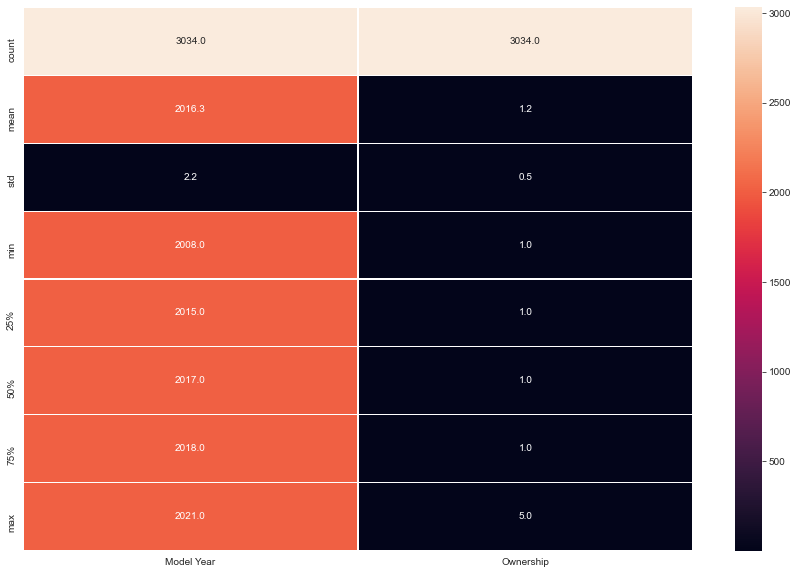

In [18]:
#visualize 
plt.figure(figsize=(15,10))
sns.heatmap(df.describe(),linewidths=0.1,fmt='0.1f',annot=True)
plt.show()

In [19]:
#Analyzing the Target Class
df['Price'].unique()

array(['621899', '524199', '476699', ..., '260499', '691099', '357099'],
      dtype=object)

In [20]:
df['Price'].value_counts()

466499    10
320999    10
299199     7
891799     7
573599     7
          ..
817899     1
654999     1
690199     1
233399     1
527399     1
Name: Price, Length: 2406, dtype: int64

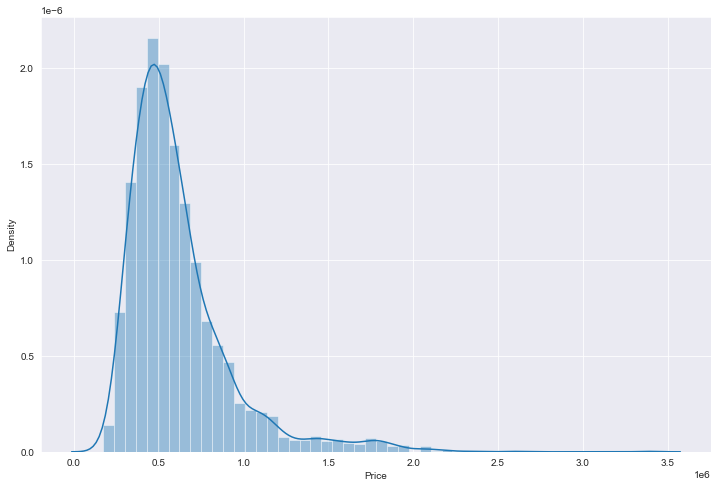

In [21]:
plt.figure(figsize=(12,8))
sns.distplot(df['Price'])
plt.show()

In [22]:
#Total number of cars in different Cities
df['Location'].unique()

array(['Hyderabad', 'Delhi', 'Mumbai', 'Bangalore', 'Chennai'],
      dtype=object)

In [23]:
df['Location'].value_counts()

Mumbai       1126
Delhi         674
Chennai       638
Bangalore     478
Hyderabad     118
Name: Location, dtype: int64

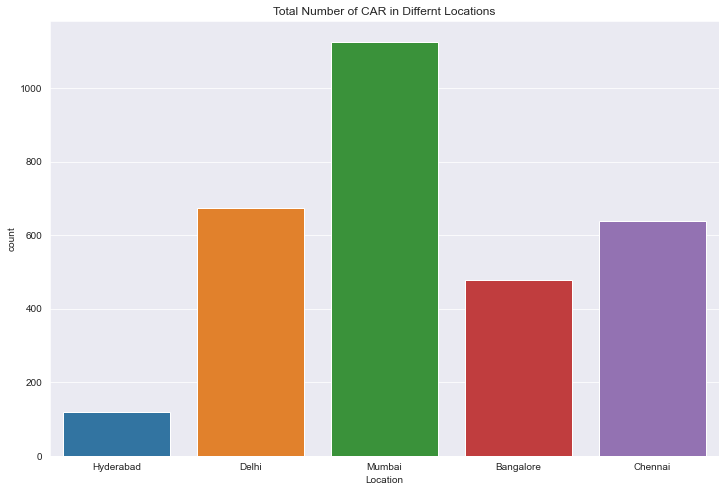

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(df['Location'])
plt.title("Total Number of CAR in Differnt Locations",fontsize=12)
plt.show()

## Mumbai       1126
## Delhi         674
## Chennai       638
## Bangalore     478
## Hyderabad     118 

In [25]:
#No. of different Brands in all Cities
df['Car Brand'].unique()

array(['Maruti', 'Honda', 'Hyundai', 'Volkswagen', 'Datsun', 'Renault',
       'Ford', 'Toyota', 'Skoda', 'Tata', 'Nissan', 'Audi', 'KIA', 'BMW',
       'Mercedes', 'Mahindra', 'MG', 'Ssangyong', 'Jeep', 'Jaguar',
       'Fiat'], dtype=object)

In [26]:
df['Car Brand'].value_counts()

Maruti        1428
Hyundai        711
Ford           200
Honda          194
Renault        115
Tata            91
Toyota          80
Volkswagen      75
Mahindra        30
MG              22
Skoda           14
BMW             13
Datsun          13
KIA             13
Nissan          12
Jeep            11
Audi             7
Mercedes         2
Jaguar           1
Fiat             1
Ssangyong        1
Name: Car Brand, dtype: int64

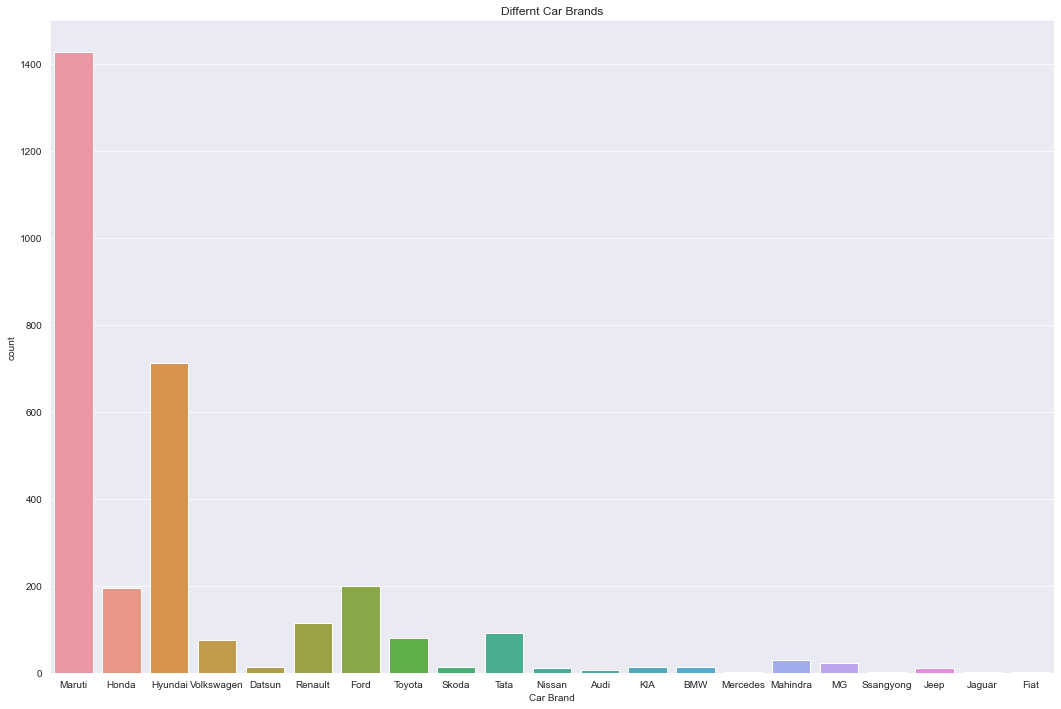

In [27]:
plt.figure(figsize=(18,12))
sns.countplot(df['Car Brand'])
plt.title("Differnt Car Brands")
plt.show()

In [28]:
#Total no. of different Car Brands in Hyderabad
hyd_city = df.loc[(df['Location'] == 'Hyderabad')]

In [29]:
hyd_brands = hyd_city['Car Brand'].value_counts().sort_values(ascending=False).reset_index().rename(columns={'Car Brand':'Count','index':'Brand'})

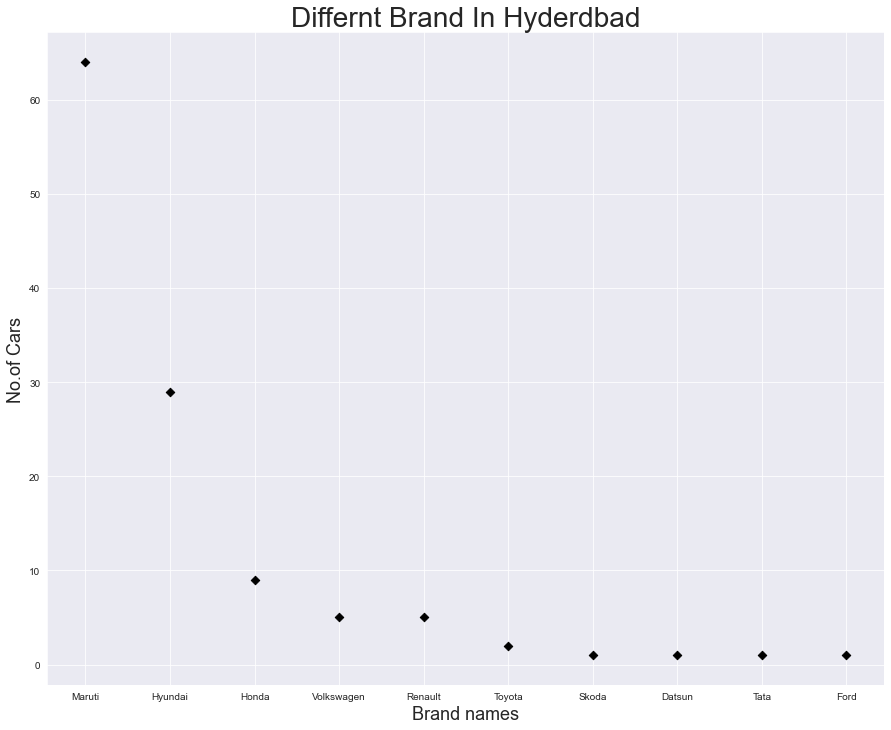

In [30]:
plt.figure(figsize=(15,12))
plt.scatter('Brand','Count',data=hyd_brands,marker='D',color='k')
plt.title("Differnt Brand In Hyderdbad",fontsize=28)
plt.xlabel("Brand names",fontsize=18)
plt.ylabel("No.of Cars",fontsize=18)
plt.show()

In [31]:
#Total no. of different Car Brands in Delhi¶
del_city = df.loc[(df['Location'] == 'Delhi')]
del_brands = del_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})

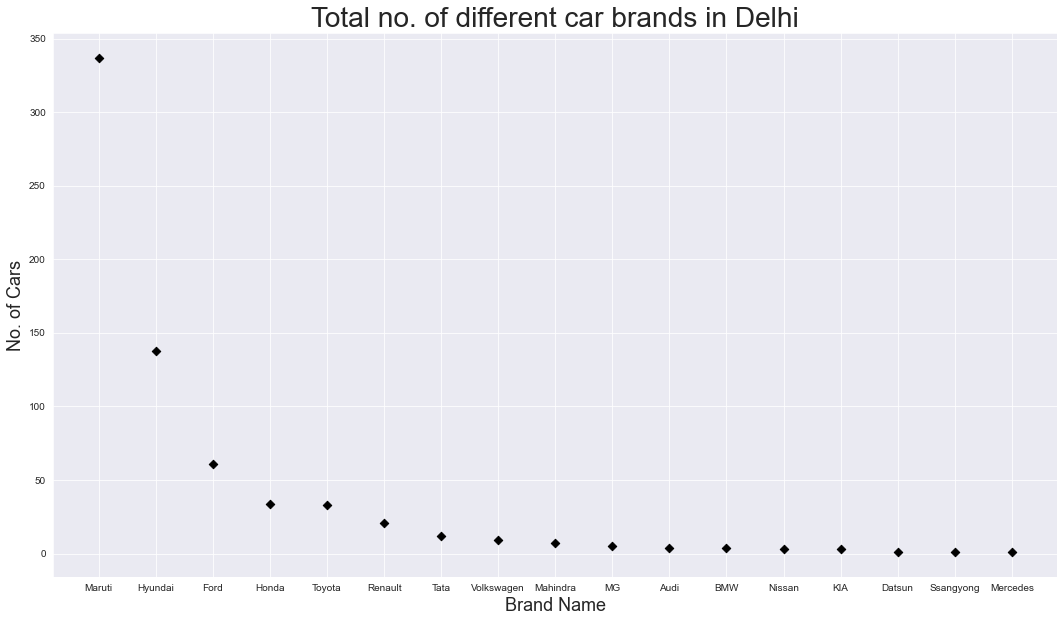

In [32]:
plt.figure(figsize=(18,10))
plt.scatter('Brand','Count',data=del_brands,color='k',marker='D')
plt.title("Total no. of different car brands in Delhi",fontsize=28)
plt.xlabel("Brand Name", fontsize = 18)
plt.ylabel("No. of Cars", fontsize =18)
plt.show()

In [33]:
#Total no. of different Car Brands in Mumbai
mum_city = df.loc[(df['Location']=='Mumbai')]

In [34]:
mum_brands = mum_city['Car Brand'].value_counts().sort_values(ascending=False).reset_index().rename(columns={'Car Brand':'Count','index':'Brands'})

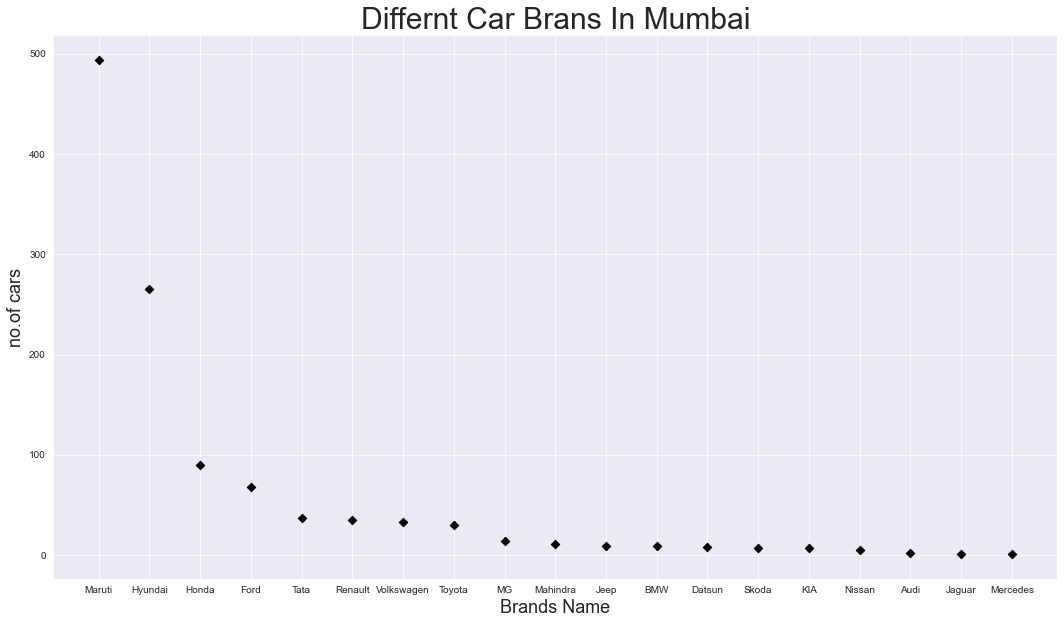

In [35]:
plt.figure(figsize=(18,10))
plt.scatter('Brands','Count',data=mum_brands,color='k',marker='D')
plt.title("Differnt Car Brans In Mumbai",fontsize=30)
plt.xlabel("Brands Name",fontsize=18)
plt.ylabel("no.of cars",fontsize=18)
plt.show()

In [36]:
#Total no. of different Car Brands in Bangalore
bangalore_city = df.loc[(df['Location'] == 'Bangalore')]

In [37]:
bangalore_brands = bangalore_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})

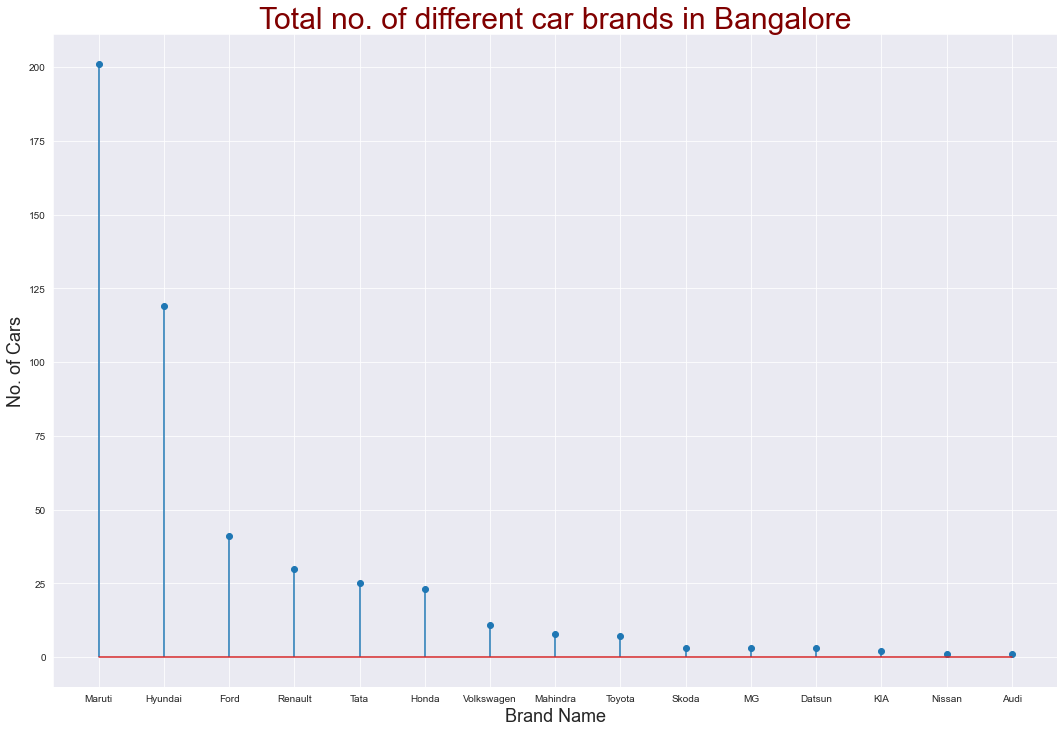

In [38]:
plt.figure(figsize=(18,12))
plt.stem('Brand','Count',data=bangalore_brands)
plt.title("Total no. of different car brands in Bangalore",fontsize=30,color='maroon')
plt.xlabel("Brand Name", fontsize = 18)
plt.ylabel("No. of Cars", fontsize = 18)
plt.show()

In [39]:
#Total no. of different Car Brands in Chennai
chennai_city = df.loc[(df['Location'] == 'Chennai')]

In [40]:
chennai_brands = chennai_city['Car Brand'].value_counts().sort_values(ascending = True).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})

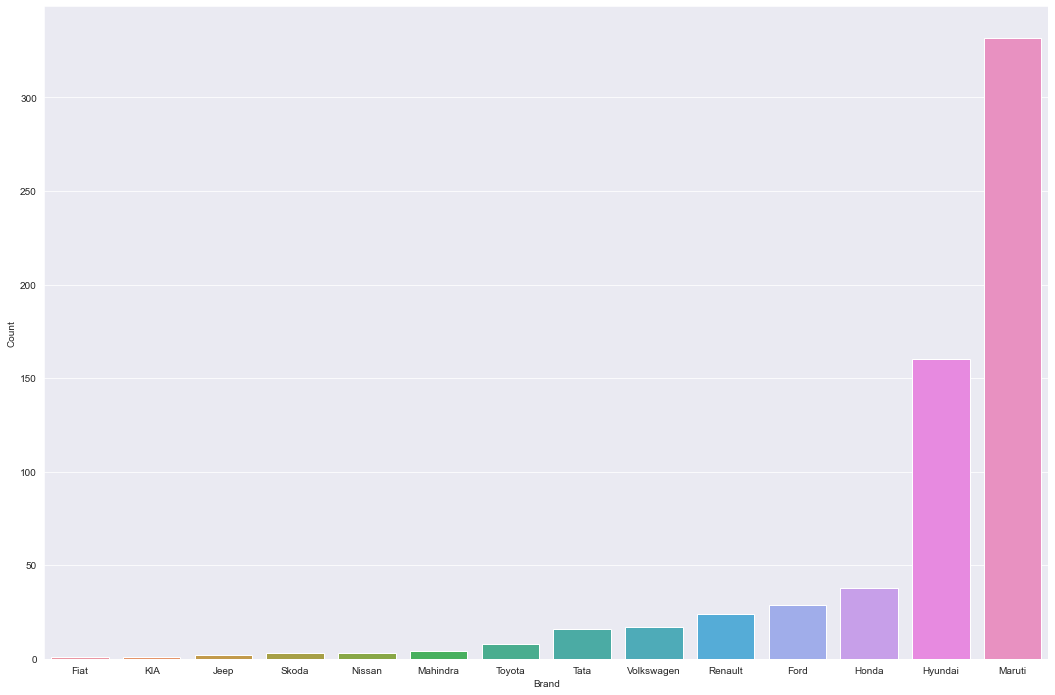

In [41]:
plt.figure(figsize=(18,12))
sns.barplot(x ='Brand',y='Count',data=chennai_brands)
plt.show()

In [42]:
#Number of Cars based on Fuel type in all cities
fuel_type = df.groupby(by=['Fuel'])['Location'].count().sort_values(ascending=False).reset_index().rename(columns={'Location':'Count'})

In [43]:
fuel_type

,Fuel,Count
0,Petrol,2222
1,Diesel,778
2,Petrol + CNG,33
3,Petrol + LPG,1


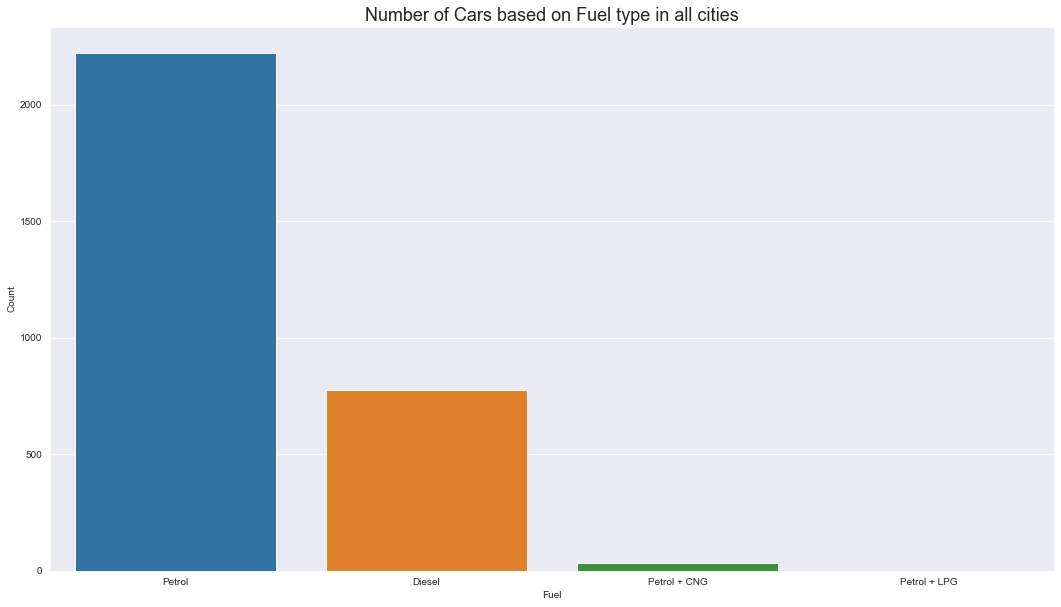

In [44]:
plt.figure(figsize=(18,10))
sns.barplot(x='Fuel',y='Count',data=fuel_type)
plt.title("Number of Cars based on Fuel type in all cities",fontsize=18)
plt.show()

In [45]:
#No. of Cars based on Fuel type in different Cities
fuel_location = df.groupby(by=['Location','Fuel'])['Gear'].count().reset_index().rename(columns={'Gear':'Count','Count':'Fuel'})
fuel_location = fuel_location.sort_values(by=['Location','Count'],ascending=True).reset_index()
fuel_location = fuel_location.drop('index',axis=1)

In [46]:
fuel_location

,Location,Fuel,Count
0,Bangalore,Petrol + LPG,1
1,Bangalore,Diesel,56
2,Bangalore,Petrol,421
3,Chennai,Diesel,71
4,Chennai,Petrol,567
5,Delhi,Petrol + CNG,11
6,Delhi,Diesel,308
7,Delhi,Petrol,355
8,Hyderabad,Diesel,20
9,Hyderabad,Petrol,98


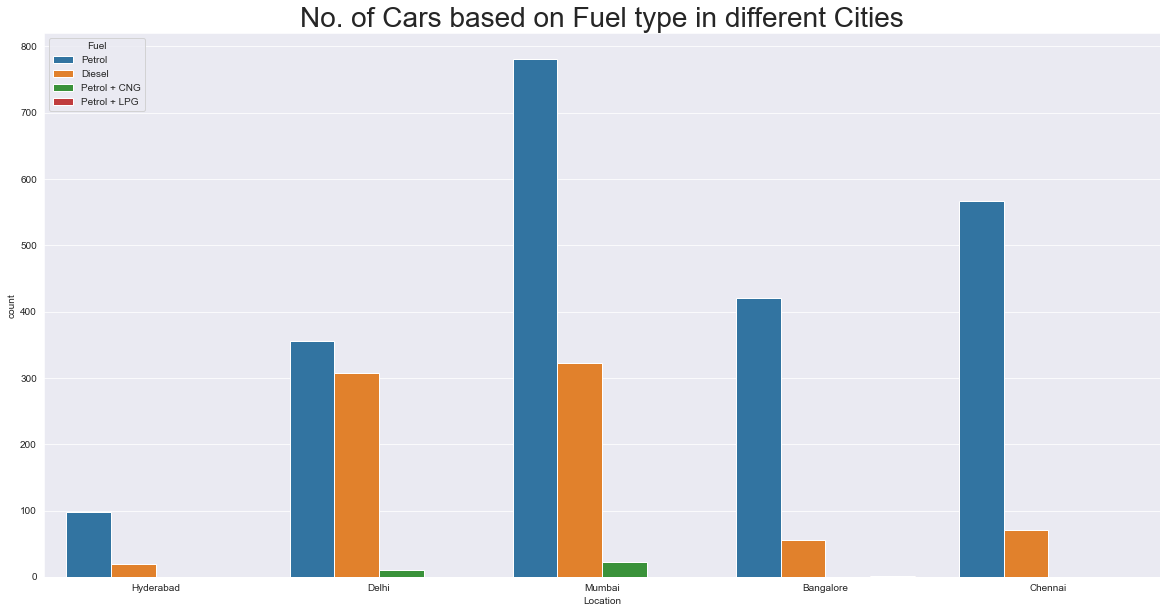

In [47]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Location',hue='Fuel',data=df)
plt.title("No. of Cars based on Fuel type in different Cities",fontsize=28)
plt.show()

In [48]:
#No. of cars in different Cities based on Model Year
model_year = df.groupby(by=['Location','Model Year'])['Gear'].count().reset_index().rename(columns={'Gear':'Count','Count':'Model Year'})
model_year = model_year.sort_values(by=['Location','Count'],ascending=True).reset_index()
model_year = model_year.drop('index',axis=1)

In [49]:
model_year

,Location,Model Year,Count
0,Bangalore,2021,1
1,Bangalore,2008,3
2,Bangalore,2009,3
3,Bangalore,2010,9
4,Bangalore,2011,14
...,...,...,...
60,Mumbai,2015,121
61,Mumbai,2019,142
62,Mumbai,2016,164
63,Mumbai,2018,217


In [50]:
model_year.shape

(65, 3)

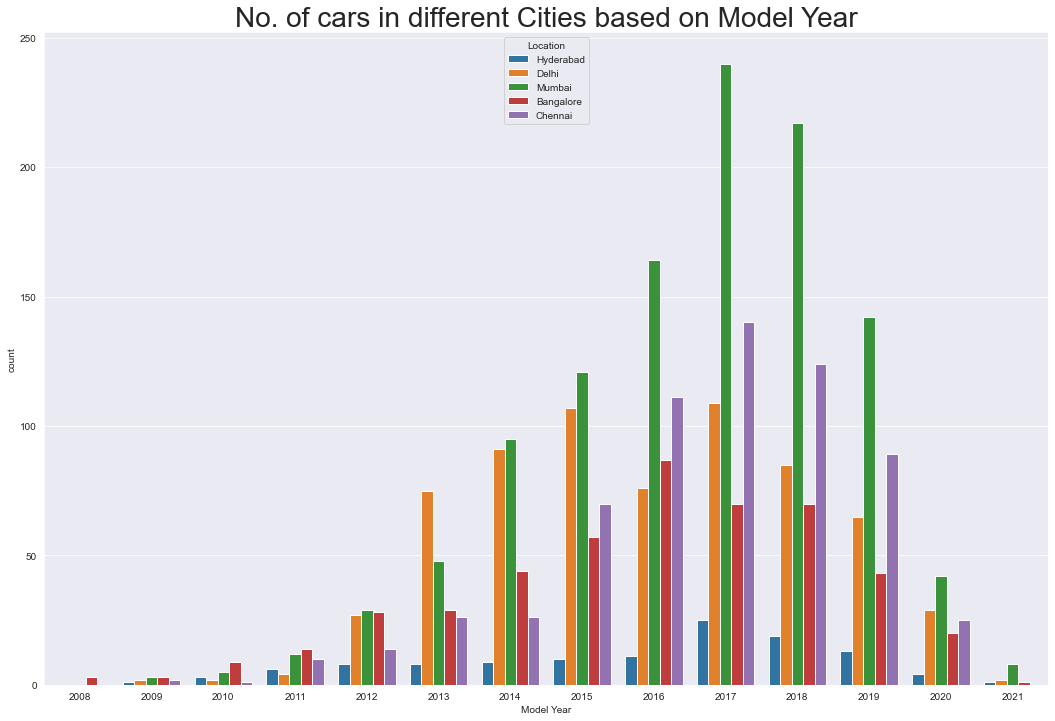

In [51]:
plt.figure(figsize=(18,12))
sns.countplot(x = 'Model Year',hue='Location',data=df)
plt.title("No. of cars in different Cities based on Model Year",fontsize=28)
plt.show()

In [52]:
#No. of Cars in different cities based on Gear
gear_type = df.groupby(by=['Location','Gear'])['Ownership'].count().reset_index().rename(columns={'Ownership':'Count'})

In [53]:
gear_type

,Location,Gear,Count
0,Bangalore,['Automatic'],89
1,Bangalore,['Manual'],379
2,Bangalore,[],10
3,Chennai,['Automatic'],103
4,Chennai,['Manual'],518
5,Chennai,[],17
6,Delhi,['Automatic'],66
7,Delhi,['Manual'],597
8,Delhi,[],11
9,Hyderabad,['Automatic'],19


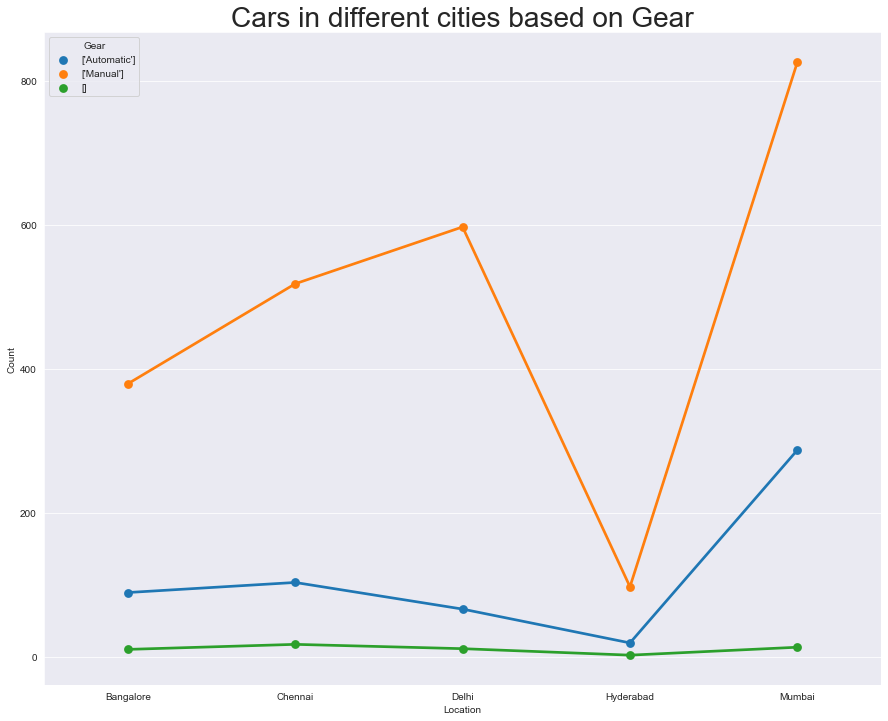

In [54]:
plt.figure(figsize=(15,12))
sns.pointplot(x='Location',y='Count',hue='Gear',data=gear_type)
plt.title("Cars in different cities based on Gear",fontsize=28)
plt.show()

In [55]:
#No. of Cars in different cities based on Ownership
location_owner = df.groupby(by=['Location','Ownership'])['Gear'].count().reset_index().rename(columns={'Gear':'Count'})
location_owner

,Location,Ownership,Count
0,Bangalore,1,345
1,Bangalore,2,118
2,Bangalore,3,14
3,Bangalore,4,1
4,Chennai,1,500
5,Chennai,2,121
6,Chennai,3,16
7,Chennai,4,1
8,Delhi,1,558
9,Delhi,2,110


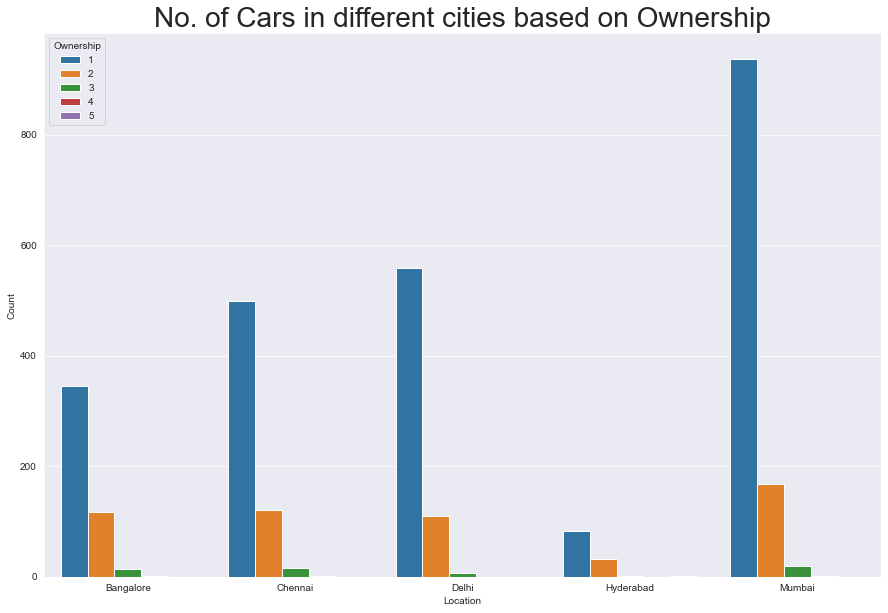

In [56]:
plt.figure(figsize=(15,10))
sns.barplot(x='Location',y='Count',data=location_owner,hue='Ownership')
plt.title("No. of Cars in different cities based on Ownership",fontsize=28)
plt.show()

In [57]:
df['Car Brand'].unique()

array(['Maruti', 'Honda', 'Hyundai', 'Volkswagen', 'Datsun', 'Renault',
       'Ford', 'Toyota', 'Skoda', 'Tata', 'Nissan', 'Audi', 'KIA', 'BMW',
       'Mercedes', 'Mahindra', 'MG', 'Ssangyong', 'Jeep', 'Jaguar',
       'Fiat'], dtype=object)

In [58]:
df['Car Brand'].value_counts()

Maruti        1428
Hyundai        711
Ford           200
Honda          194
Renault        115
Tata            91
Toyota          80
Volkswagen      75
Mahindra        30
MG              22
Skoda           14
BMW             13
Datsun          13
KIA             13
Nissan          12
Jeep            11
Audi             7
Mercedes         2
Jaguar           1
Fiat             1
Ssangyong        1
Name: Car Brand, dtype: int64

In [59]:
df

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,Maruti,['BalenoZETA 1.2 K12'],621899,2016,Hyderabad,Petrol,103354,['Manual'],1,13834
1,Honda,['Jazz1.2 V AT'],524199,2015,Hyderabad,Petrol,65571,['Automatic'],2,11661
2,Maruti,['SwiftZDI'],476699,2012,Hyderabad,Diesel,78819,['Manual'],2,10604
3,Maruti,['Alto 800LXI'],295499,2016,Hyderabad,Petrol,20215,['Manual'],2,6573
4,Hyundai,['i20SPORTZ 1.2 O'],378299,2010,Hyderabad,Petrol,79222,['Manual'],2,8415
...,...,...,...,...,...,...,...,...,...,...
3029,Maruti,['Alto 800LXI'],260499,2014,Chennai,Petrol,39845,['Manual'],3,5795
3030,Maruti,['CiazALPHA 1.3 DDIS SHVS'],691099,2017,Chennai,Diesel,93258,['Manual'],1,15373
3031,Skoda,['RapidStyle 1.5 TDI AT'],1077299,2018,Chennai,Diesel,64861,['Automatic'],1,23964
3032,Renault,['KwidRXT'],369799,2017,Chennai,Petrol,22293,['Manual'],1,8226


In [60]:
#Comparision of car brand count in different Cities
count_brand = df.groupby(by=['Location','Car Brand'])['Price'].count().reset_index().rename(columns={'Price':'Count'})

In [61]:
count_brand

,Location,Car Brand,Count
0,Bangalore,Audi,1
1,Bangalore,Datsun,3
2,Bangalore,Ford,41
3,Bangalore,Honda,23
4,Bangalore,Hyundai,119
...,...,...,...
70,Mumbai,Renault,35
71,Mumbai,Skoda,7
72,Mumbai,Tata,37
73,Mumbai,Toyota,30


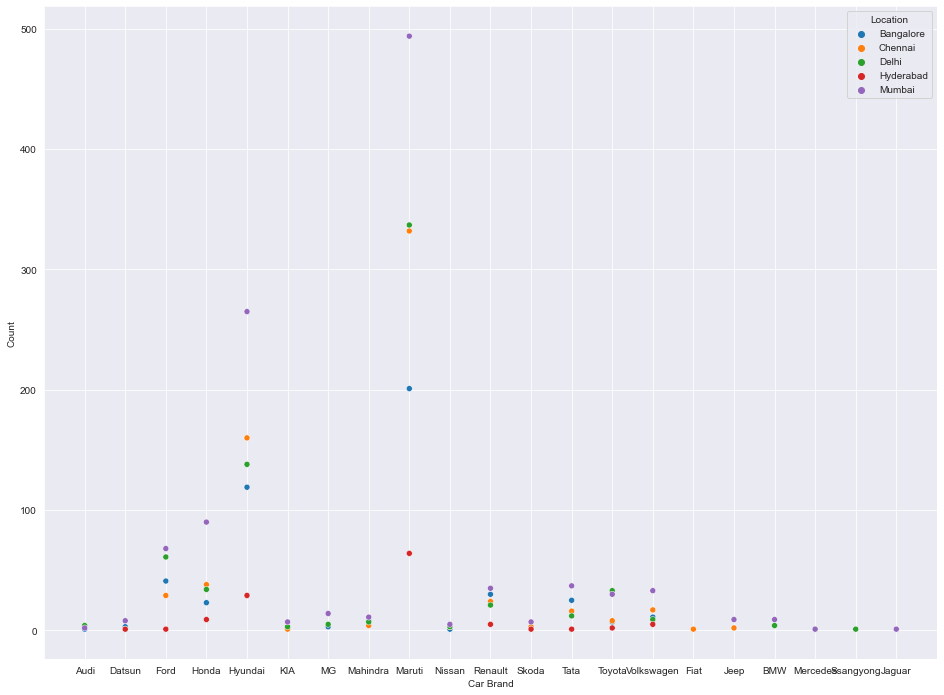

In [62]:
plt.figure(figsize=(16,12))
sns.scatterplot(x='Car Brand',y='Count',data=count_brand,hue='Location')
plt.show()

In [63]:
df.head()

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,Maruti,['BalenoZETA 1.2 K12'],621899,2016,Hyderabad,Petrol,103354,['Manual'],1,13834
1,Honda,['Jazz1.2 V AT'],524199,2015,Hyderabad,Petrol,65571,['Automatic'],2,11661
2,Maruti,['SwiftZDI'],476699,2012,Hyderabad,Diesel,78819,['Manual'],2,10604
3,Maruti,['Alto 800LXI'],295499,2016,Hyderabad,Petrol,20215,['Manual'],2,6573
4,Hyundai,['i20SPORTZ 1.2 O'],378299,2010,Hyderabad,Petrol,79222,['Manual'],2,8415


# Label Encoding:

In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
le = LabelEncoder()

In [66]:
df['Car Brand'] = le.fit_transform(df['Car Brand'])

In [67]:
df['Model'] = le.fit_transform(df['Model'])

In [68]:
df['Location'] = le.fit_transform(df['Location'])

In [69]:
df['Fuel'] = le.fit_transform(df['Fuel'])

In [70]:
df['Gear'] = le.fit_transform(df['Gear'])

In [71]:
df.tail()

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
3029,12,15,260499,2014,1,1,39845,1,3,5795
3030,12,87,691099,2017,1,0,93258,1,1,15373
3031,16,405,1077299,2018,1,0,64861,0,1,23964
3032,15,349,369799,2017,1,1,22293,1,1,8226
3033,12,611,357099,2017,1,1,18747,2,3,7943


In [72]:
#correlation
df.corr()

,Car Brand,Model,Model Year,Location,Fuel,Gear,Ownership
Car Brand,1.000000,0.078219,0.046702,-0.017533,-0.041568,-0.010808,-0.041476
Model,0.078219,1.000000,-0.110138,-0.002373,-0.134076,0.112784,0.007327
Model Year,0.046702,-0.110138,1.000000,0.073831,0.108095,-0.132639,-0.181731
Location,-0.017533,-0.002373,0.073831,1.000000,-0.120397,-0.098900,-0.074950
Fuel,-0.041568,-0.134076,0.108095,-0.120397,1.000000,-0.043363,0.026760
Gear,-0.010808,0.112784,-0.132639,-0.098900,-0.043363,1.000000,-0.032463
Ownership,-0.041476,0.007327,-0.181731,-0.074950,0.026760,-0.032463,1.000000


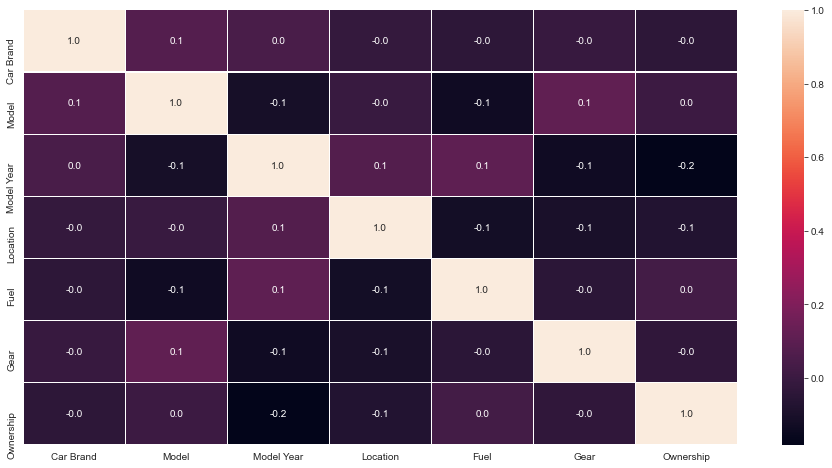

In [73]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),linewidths=0.1,fmt='0.1f',annot=True)
plt.show()

In [74]:
##Checking For Outliers:
X = df.drop(columns=['Price'])
y = df['Price']

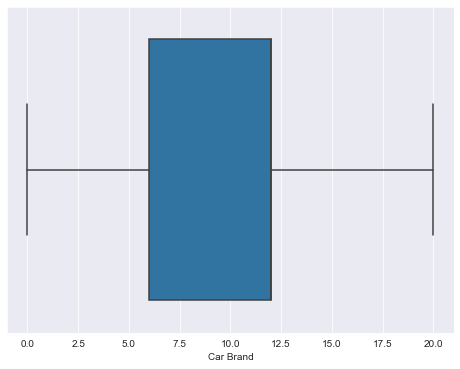

In [75]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Car Brand'])
plt.show()

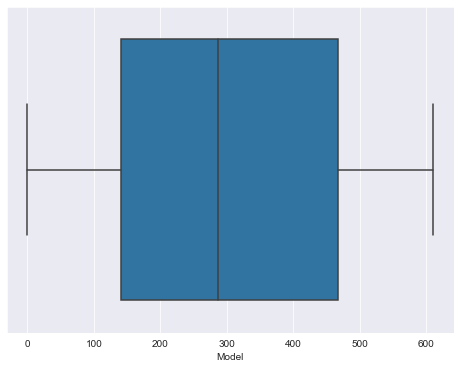

In [76]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Model'])
plt.show()

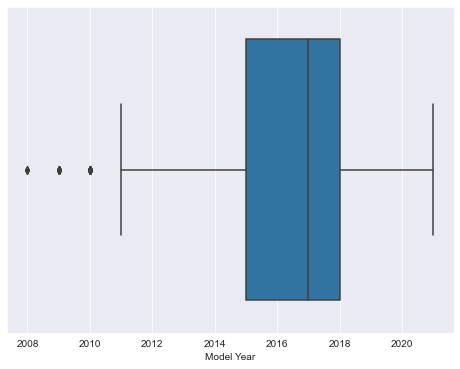

In [77]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Model Year'])
plt.show()

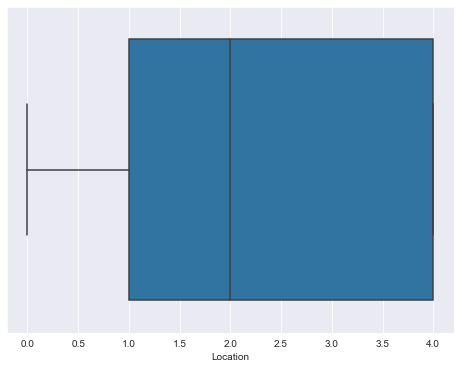

In [78]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Location'])
plt.show()

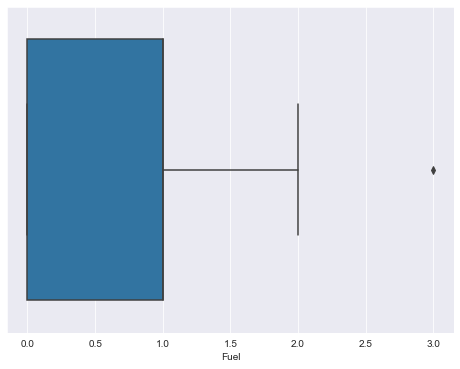

In [79]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Fuel'])
plt.show()

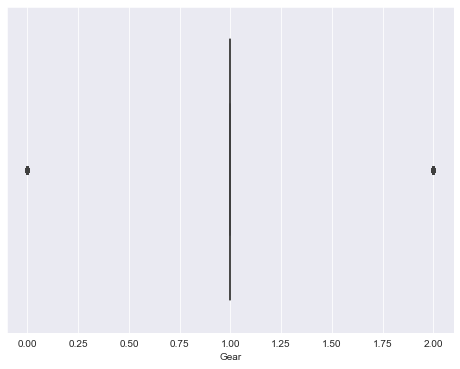

In [80]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Gear'])
plt.show()

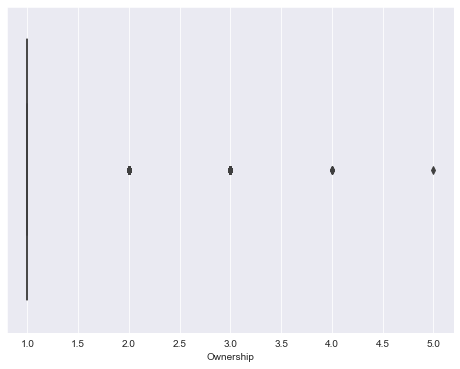

In [81]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Ownership'])
plt.show()

# Removing Outliers:

In [82]:
from scipy.stats import zscore
z = zscore

In [83]:
df1 = X[['Ownership','Gear','Model Year','Fuel']].copy()

In [84]:
Z = z(df1)

In [85]:
z_abs_score = np.abs(Z)

In [86]:
df2 = df1[(z_abs_score < 3).all(axis=1)]   #thresold 3

In [87]:
df2.shape

(2959, 4)

In [88]:
df1.shape

(3034, 4)

In [89]:
dropindx = X.index.difference(df2.index)

In [90]:
df.drop(dropindx,inplace = True) #dropping the outlier Dataframe

In [91]:
df.shape

(2959, 10)

# Skewness:

In [92]:
df.skew()

Car Brand        0.202041
Model            0.035684
Price            2.202381
Model Year      -0.477701
Location        -0.076168
Fuel            -0.828273
Driven (Kms)     1.612460
Gear            -1.039605
Ownership        1.627382
EMI (monthly)    2.202381
dtype: float64

In [93]:
X.skew()

Car Brand        0.206121
Model            0.034507
Model Year      -0.577649
Location        -0.069799
Fuel            -0.786651
Driven (Kms)     1.592497
Gear            -1.028127
Ownership        2.150350
EMI (monthly)    2.198946
dtype: float64

## Plotting Skewness:

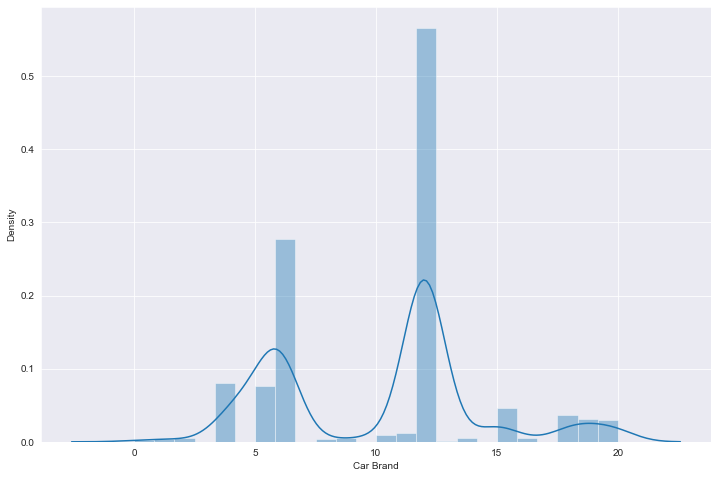

In [95]:
plt.figure(figsize=(12,8))
sns.distplot(df['Car Brand'])
plt.show()

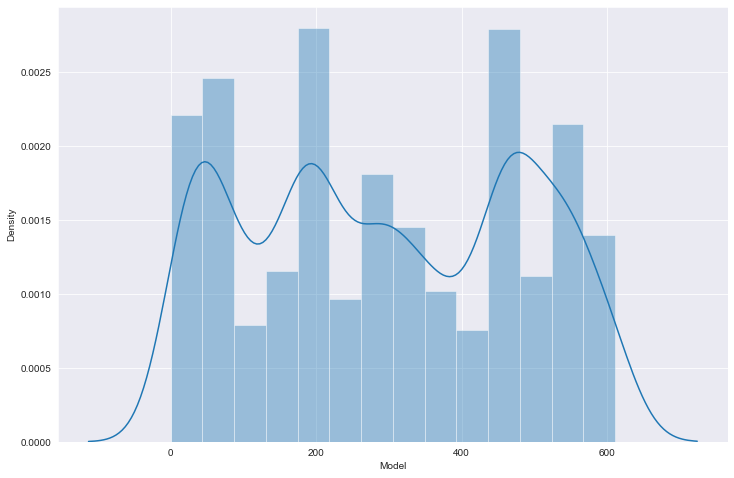

In [96]:
plt.figure(figsize=(12,8))
sns.distplot(df['Model'])
plt.show()

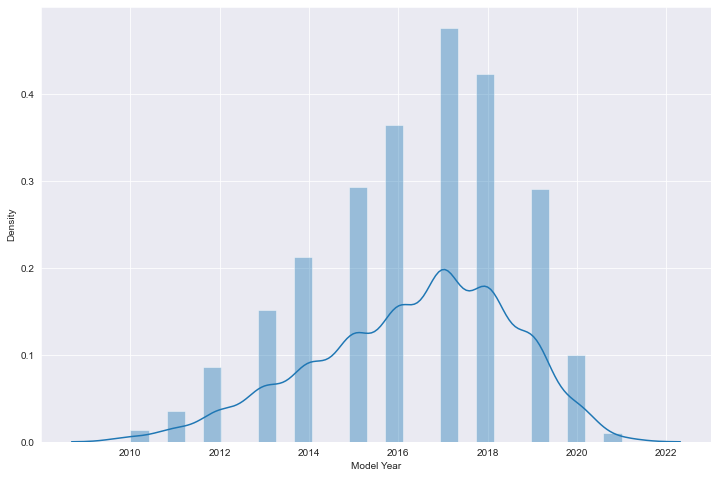

In [97]:
plt.figure(figsize=(12,8))
sns.distplot(df['Model Year'])
plt.show()

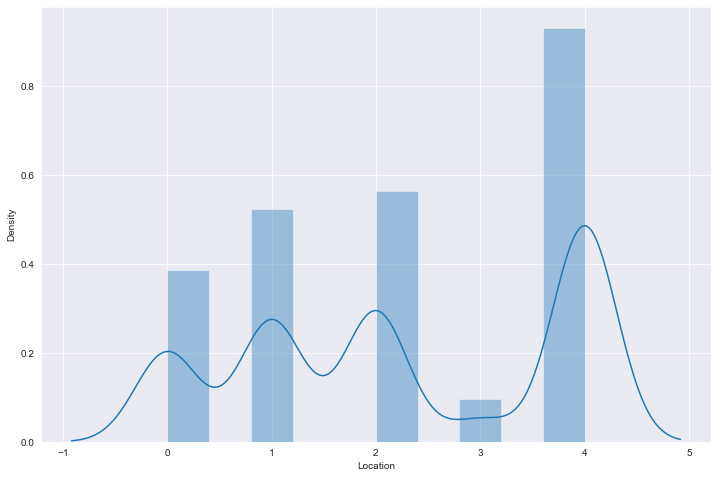

In [99]:
plt.figure(figsize=(12,8))
sns.distplot(df['Location'])
plt.show()

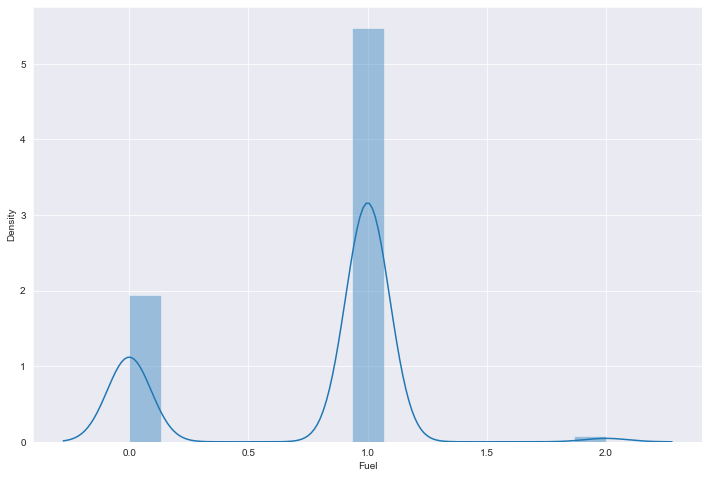

In [100]:
plt.figure(figsize=(12,8))
sns.distplot(df['Fuel'])
plt.show()

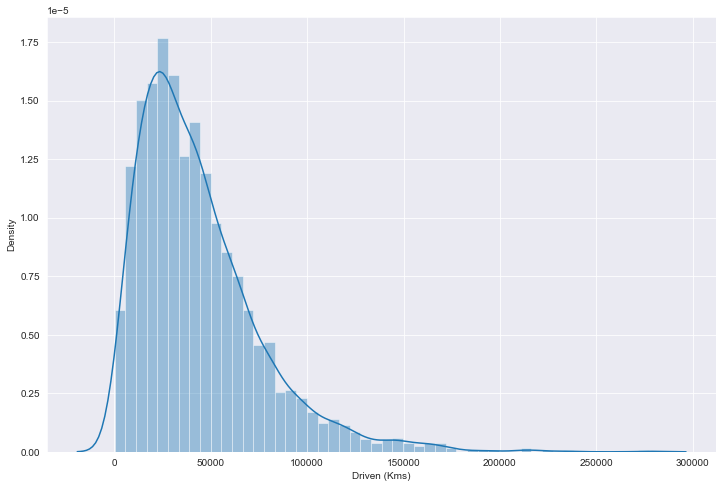

In [101]:
plt.figure(figsize=(12,8))
sns.distplot(df['Driven (Kms)'])
plt.show()

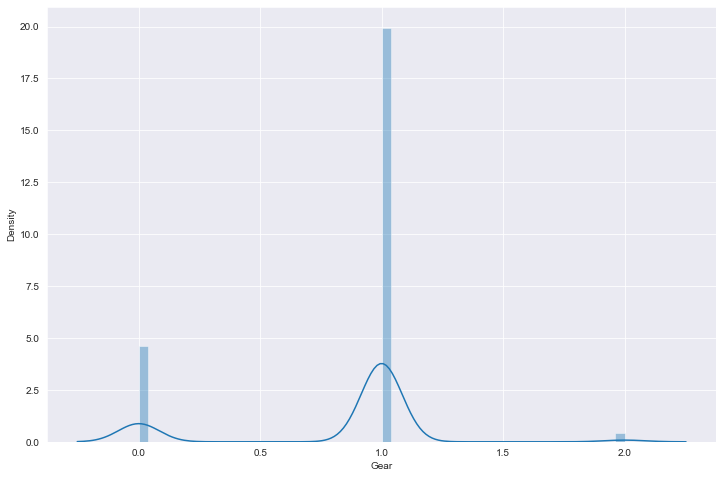

In [103]:
plt.figure(figsize=(12,8))
sns.distplot(df['Gear'])
plt.show()

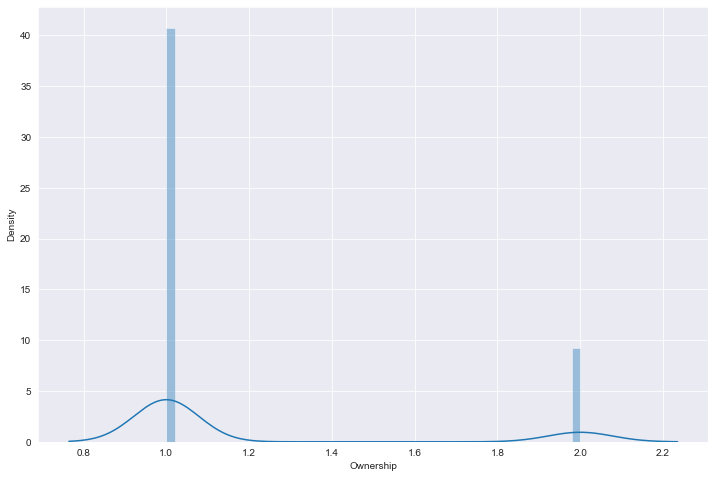

In [104]:
plt.figure(figsize=(12,8))
sns.distplot(df['Ownership'])
plt.show()

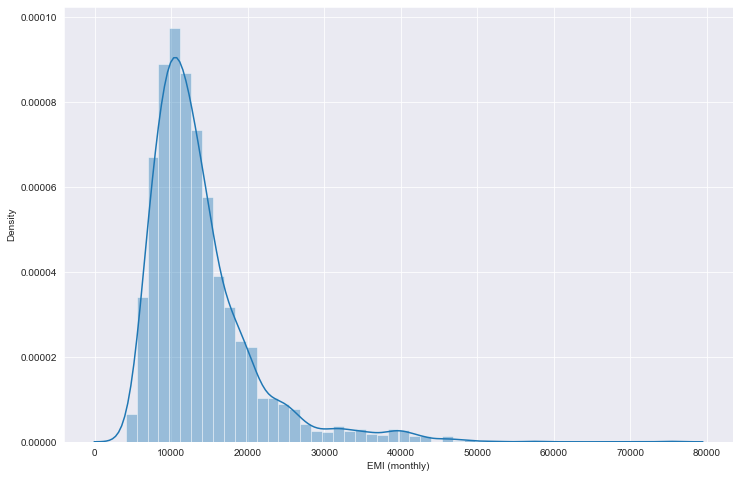

In [106]:
plt.figure(figsize=(12,8))
sns.distplot(df['EMI (monthly)'])
plt.show()

#### Standerd Scaler Method:

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)

In [111]:
scaled_X

array([[ 0.42987275, -1.29069206,  0.01097528, ...,  0.40185122,
        -0.47568303,  0.01100539],
       [-1.2132264 ,  0.16873452, -0.30848932, ..., -1.99548298,
         2.10224021, -0.30841746],
       [ 0.42987275,  0.94960852, -0.46380732, ...,  0.40185122,
         2.10224021, -0.4637925 ],
       ...,
       [ 0.42987275, -1.12913192,  0.23724908, ...,  0.40185122,
        -0.47568303,  0.23723263],
       [ 1.36878655,  0.58340554,  1.50006616, ..., -1.99548298,
        -0.47568303,  1.50007744],
       [ 1.1340581 ,  0.28182662, -0.81335457, ...,  0.40185122,
        -0.47568303, -0.81334959]])

# Principle Component Analysis

In [112]:
from sklearn.decomposition import PCA

In [113]:
pca = PCA()

In [114]:
data_pca = pca.fit(scaled_X)

In [115]:
data_pca.explained_variance_ratio_

array([2.56080899e-01, 1.71107189e-01, 1.12156798e-01, 1.01262173e-01,
       9.87489437e-02, 9.04903260e-02, 7.95275726e-02, 5.05315853e-02,
       4.00945138e-02, 9.04401110e-11])

In [116]:
var_component = np.cumsum(data_pca.explained_variance_ratio_)*100
var_component

array([ 25.60808993,  42.71880879,  53.93448857,  64.06070584,
        73.93560022,  82.98463282,  90.93739008,  95.99054861,
        99.99999999, 100.        ])

In [117]:
#finding cumulative variance
k = np.argmax(var_component>99)
print('Number of components explaining 99% variance:',k)

Number of components explaining 99% variance: 8


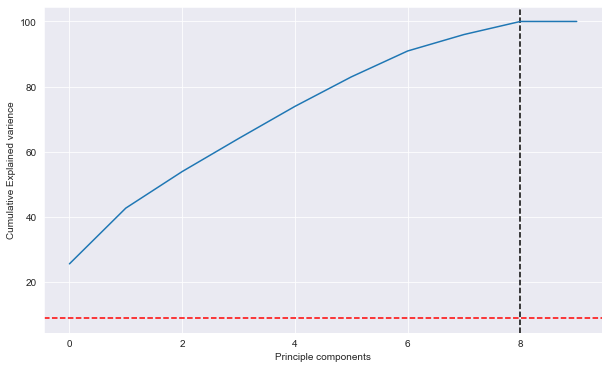

In [122]:
#ploting cumulative variance
plt.figure(figsize=(10,6))
plt.ylabel('Cumulative Explained varience')
plt.xlabel('Principle components')
plt.axvline(x=k, color='k',linestyle='--')
plt.axhline(y=9, color='r',linestyle='--')
plt.plot(var_component)
plt.show()

# Model Building:

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.svm import SVR
from sklearn import metrics
from xgboost import XGBRegressor

In [129]:
#Spliting Data:
X = df.drop(columns=['Price'])
y = df['Price']

In [130]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30,random_state=i)
    model = LinearRegression()
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9999999985465633  on Random_state  56


In [132]:
X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,test_size=0.30,random_state=56)

# Linear Regression

In [133]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [135]:
lr.score(X_train,y_train)

1.0

In [136]:
pred_lr = lr.predict(X_test)

In [138]:
print('R2_Score:',r2_score(y_test,pred_lr))
print('MAE:',metrics.mean_absolute_error(y_test, pred_lr))
print('MSE:',metrics.mean_squared_error(y_test, pred_lr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_lr)))

R2_Score: 1.0
MAE: 2.4620267386372026e-10
MSE: 9.799637034810563e-20
RMSE: 3.1304371954745493e-10


# DecisionTreeRegressor

In [139]:
dtc = DecisionTreeRegressor()
dtc.fit(X_train,y_train)

DecisionTreeRegressor()

In [140]:
dtc.score(X_train,y_train)

1.0

In [141]:
pred_dtc = dtc.predict(X_test)

In [142]:
print('R2_Score:',r2_score(y_test,pred_dtc))
print('MAE:',metrics.mean_absolute_error(y_test, pred_dtc))
print('MSE:',metrics.mean_squared_error(y_test, pred_dtc))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_dtc)))

R2_Score: 0.9796620584019553
MAE: 3747.070945945946
MSE: 2186999233.3344593
RMSE: 46765.36360742274


# RandomForestRegressor

In [147]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [148]:
rf.score(X_train,y_train)

0.9999520041112573

In [149]:
pred_rf = rf.predict(X_test)

In [150]:
print('R2_Score:',r2_score(y_test,pred_rf))
print('MAE:',metrics.mean_absolute_error(y_test, pred_rf))
print('MSE:',metrics.mean_squared_error(y_test, pred_rf))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_rf)))

R2_Score: 0.983837852498077
MAE: 2474.8975225225226
MSE: 1737963698.3096848
RMSE: 41688.89178557862


# AdaBoostRegressor

In [153]:
ad = AdaBoostRegressor()
ad.fit(X_train,y_train)

AdaBoostRegressor()

In [154]:
ad.score(X_train,y_train)

0.9922419869020412

In [155]:
pred_ad = ad.predict(X_test)

In [156]:
print('R2_Score:',r2_score(y_test,pred_ad))
print('MAE:',metrics.mean_absolute_error(y_test, pred_ad))
print('MSE:',metrics.mean_squared_error(y_test, pred_ad))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_ad)))

R2_Score: 0.9782623687960478
MAE: 22028.563066416675
MSE: 2337512011.644347
RMSE: 48347.82323584328


# GradientBoostingRegressor

In [157]:
grd =  GradientBoostingRegressor()
grd.fit(X_train,y_train)

GradientBoostingRegressor()

In [158]:
grd.score(X_train,y_train)

0.9999353988391735

In [159]:
pred_grd = grd.predict(X_test)

In [160]:
print('R2_Score:',r2_score(y_test,pred_grd))
print('MAE:',metrics.mean_absolute_error(y_test, pred_grd))
print('MSE:',metrics.mean_squared_error(y_test, pred_grd))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_grd)))

R2_Score: 0.9874600957386385
MAE: 3675.768411098132
MSE: 1348453130.0021966
RMSE: 36721.28987388919


# XGBRegressor

In [161]:
xg =  XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [162]:
xg.score(X_train,y_train)

0.9999929366369495

In [163]:
pred_xg = xg.predict(X_test)

In [164]:
print('R2_Score:',r2_score(y_test,pred_xg))
print('MAE:',metrics.mean_absolute_error(y_test, pred_xg))
print('MSE:',metrics.mean_squared_error(y_test, pred_xg))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_xg)))

R2_Score: 0.9862582734370778
MAE: 4017.365938203829
MSE: 1477688649.7054315
RMSE: 38440.716040488


# SVR

In [166]:
sv = SVR()
sv.fit(X_train,y_train)

SVR()

In [167]:
pred_sv = sv.predict(X_test)

In [168]:
print('R2_Score:',r2_score(y_test,pred_sv))
print('MAE:',metrics.mean_absolute_error(y_test, pred_sv))
print('MSE:',metrics.mean_squared_error(y_test, pred_sv))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_sv)))

R2_Score: -0.08595045212027808
MAE: 210364.2432202676
MSE: 116775475766.66196
RMSE: 341724.26862407936


# Cross Validation Score

In [171]:
 #Checking cv score for Linear Regression
print(cross_val_score(lr,X,y,cv=5).mean())

0.9999999976897763


In [173]:
#checking cv score for Decisiontreeregresssor
print(cross_val_score(dtc,X,y,cv=5).mean())

0.997486342897349


In [174]:
# Checking cv score for randomforestRegression
print(cross_val_score(rf,X,y,cv=5).mean())

0.9967074239138546


In [175]:
# Checking cv score for AdaBoostRegressor
print(cross_val_score(ad,X,y,cv=5).mean())

0.9839385725272374


In [176]:
# Checking cv score for GradientBoostingRegressor
print(cross_val_score(grd,X,y,cv=5).mean())

0.9977437875586054


In [177]:
#Checking cv score for svr
print(cross_val_score(sv,X,y,cv=5).mean())

-0.09799840899638257


# All the models performances are near to each others. Since, in most of the scenarios RandomForestRegressor is best, We will tune parameters for it and check its performance

# HyperParameter Tuning

In [184]:
params  = {'n_estimators' : [300, 500, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8]}

In [185]:
GCV = GridSearchCV(RandomForestRegressor(),param_grid = params, scoring ='r2', cv=5)

In [186]:
GCV.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [300, 500, 700, 1000, 2100]},
             scoring='r2')

In [187]:
GCV.best_params_

{'max_depth': 13,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 700}

In [188]:
final_model = RandomForestRegressor(n_estimators = 1000, max_depth = 15, max_features = 'auto', min_samples_split = 2)

final_model.fit(X,y)

RandomForestRegressor(max_depth=15, n_estimators=1000)

In [189]:
final_model.score(X,y)

0.999337420910088

# Saving

In [190]:
import joblib
joblib.dump(final_model,'USEDCARPRICEPREDICTION.pkl')

['USEDCARPRICEPREDICTION.pkl']

# !!!! THANK YOU !!!!